## Principal Component Analysis - Basic Example

This code shows a simple example of running PCA (Principal Component Analysis) 
to reduce the dimension of given data. It is done with SVD (Singular Value
Decomposition) in numpy to get the vector of the new plane of projection, and
the data points are plotted before and after compression and reconstruction.

### PCA, projection, and reconstruction functions

In [16]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.io import loadmat

def pca(X):
    # normalize the features
    X = (X - X.mean()) / X.std()    
    # compute the covariance matrix
    X = np.matrix(X)
    cov = (X.T * X) / X.shape[0]    
    # perform SVD
    U, S, V = np.linalg.svd(cov)    
    return U, S, V, cov

def project_data(X, U, k):
    # reduce the dimension to k
    U_reduced = U[:,:k]
    # project the data on k-hyperplane
    return np.dot(X, U_reduced)

def recover_data(Z, U, k):
    # recover the data to show how they would look after the compression
    U_reduced = U[:,:k]
    return np.dot(Z, U_reduced.T)

### Import, prepare, and plot data

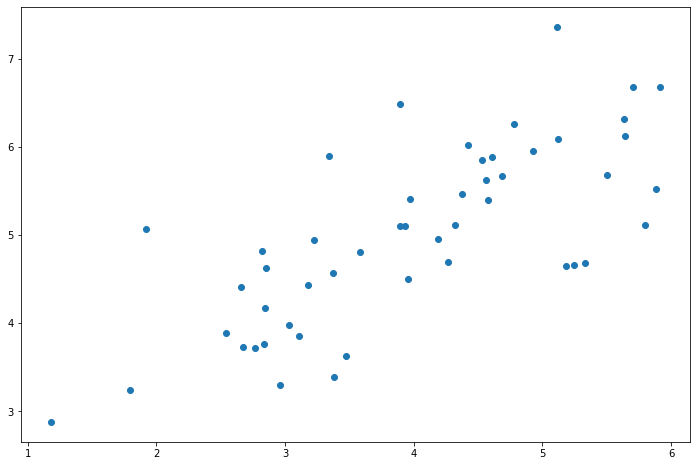

In [17]:
# Load and plot data:
data = loadmat('ex7data1.mat')
X = data['X']
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(X[:, 0], X[:, 1])

### Compute U and project data do one dimension

In [18]:
# Compute U:
U, S, V, cov = pca(X)
# Project data to 1-dimensional line:
k = 1
Z = project_data(X, U, k)

print ("Variance retained: ",sum(S[:k])/sum(S))

Variance retained:  0.7179226819314078


### Reconstruct data and plot

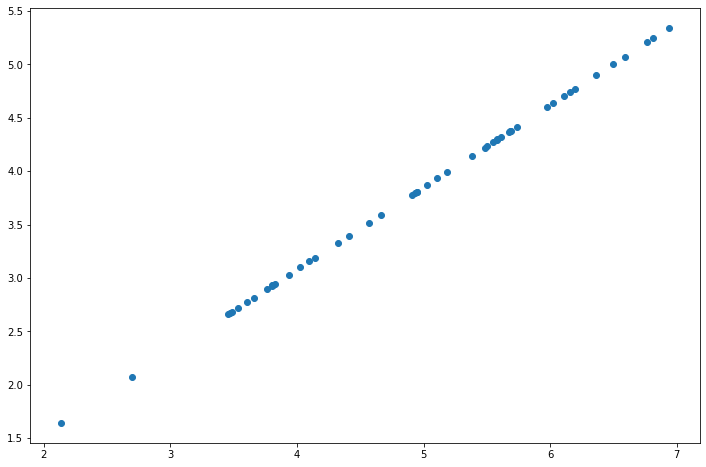

In [19]:
# Recover and plot data to visualise their post compression state:
X_recovered = recover_data(Z, U, k)
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter([X_recovered[:, 0]], [X_recovered[:, 1]]) 
#diff = X-X_recovered    # the reconstruction error 
#print (diff) 